In [ ]:
# https://github.com/openai/whisper
# https://github.com/linto-ai/whisper-timestamped/tree/master/whisper_timestamped

In [30]:
link = "https://www.youtube.com/watch?v=5p248yoa3oE"

In [51]:
from urllib.parse import urlparse, parse_qs

def extract_main_domain_and_video_id(url):
    parsed_url = urlparse(url)
    domain_parts = parsed_url.netloc.split('.')
    main_domain = domain_parts[-2] if len(domain_parts) >= 2 else None
    query_params = parse_qs(parsed_url.query)
    video_id = query_params.get('v', [None])[0]
    return f"{main_domain}_{video_id}"

'youtube_5p248yoa3oE'

In [42]:
import json
import os

def write_to_json(file_path, data, overwrite=False):
    """
    Write data to a JSON file.
    
    Parameters:
        file_path (str): The path to the file.
        data (dict): The data to write.
        overwrite (bool): Whether to overwrite the file if it exists.
    """
    # Check if the file already exists
    if os.path.exists(file_path):
        if not overwrite:
            print(f"File {file_path} already exists. Skipping.")
            return
        else:
            print(f"File {file_path} already exists. Overwriting.")
    
    # Write the data to the file
    with open(file_path, 'w') as f:
        json.dump(data, f)
    print(f"Data written to {file_path}")


In [53]:
write_to_json(file_path=extract_main_domain_and_video_id(link), data=result)

Data written to youtube_5p248yoa3oE


In [2]:
import os
import whisper
from pytube import YouTube

def startfile(fn):
    """Open a file with the default application."""
    os.system(f'open {fn}')

def create_and_open_txt(text, filename):
    """Create a txt file, write the text into it, and then open it."""
    with open(filename, "w") as file:
        file.write(text)
    startfile(filename)

def main():
    # Get YouTube video URL from the user
    url = input("Enter the YouTube video URL: ")

    # Initialize YouTube object
    yt = YouTube(url)

    # Get the audio stream
    audio_stream = yt.streams.filter(only_audio=True).first()

    # Define output path and filename
    output_path = "YoutubeAudios"
    filename = "audio.mp3"

    # Download the audio
    audio_stream.download(output_path=output_path, filename=filename)
    print(f"Audio downloaded to {output_path}/{filename}")

    # Transcribe the audio using Whisper
    model = whisper.load_model("base")
    result = model.transcribe(f"{output_path}/{filename}")
    transcribed_text = result["text"]
    print(transcribed_text)


    # Create and open a txt file with the transcribed text
    create_and_open_txt(transcribed_text, f"output.txt")

if __name__ == "__main__":
    main()


Enter the YouTube video URL:  https://www.youtube.com/watch?v=5p248yoa3oE


Audio downloaded to YoutubeAudios/audio.mp3


/Users/saazizi/miniconda3/lib/python3.10/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 It is my pleasure to welcome Dr. Andrew Wu tonight. Andrew is the managing general partner of AI Fund, founder of Deep Learning AI, and lending AI, Chairman and co-founder of Coursera, and an unjunct professor of computer science here at Stanford. Previously he had started and led the Google Brain Team, which had helped Google adopt modern AI, and he was also director of the Stanford AI lab. From 8 million people, one in 1,000 persons on the planet have taken an AI class from him, and through both his education and his AI work, he has changed humor's lives. Please welcome Dr. Andrew Wu. Thank you Lisa, it's good to see everyone. So what I want to do today is chat to you about some opportunities in AI. So I've been saying AI is a new electricity. One of the difficult things to understand about AI is that it is a general purpose technology, meaning that it's not useful only for one thing, but it's useful for lots of different applications, kind of like electricity. If I was to ask you w

In [8]:
import whisper_timestamped
help(whisper_timestamped.transcribe)

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.

Help on function transcribe_timestamped in module whisper_timestamped.transcribe:

transcribe_timestamped(model, audio, language=None, task='transcribe', remove_punctuation_from_words=False, compute_word_confidence=True, include_punctuation_in_confidence=False, refine_whisper_precision=0.5, min_word_duration=0.02, plot_word_alignment=False, word_alignement_most_top_layers=None, remove_empty_words=False, seed=1234, vad=False, detect_disfluencies=False, trust_whisper_timestamps=True, naive_approach=False, temperature=0.0, best_of=None, beam_size=None, patience=None, length_penalty=None, compression_ratio_threshold=2.4, logprob_threshold=-1.0, no_speech_threshold=0.6, fp16=None, condition_on_previous_text=True, initial_prompt=None, suppress_tokens='-1', sample_len=None, verbose=Fals

In [20]:
import whisper_timestamped as whisper

audio = whisper.load_audio("YoutubeAudios/audio.wav")


In [21]:

model = whisper.load_model("base", device="cpu")


In [22]:

result = whisper.transcribe(model, audio)

# import json
# print(json.dumps(result, indent = 2, ensure_ascii = False))

Detected language: English


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 221453/221453 [02:40<00:00, 1383.19frames/s]


In [41]:
result.keys()

dict_keys(['text', 'segments', 'language'])

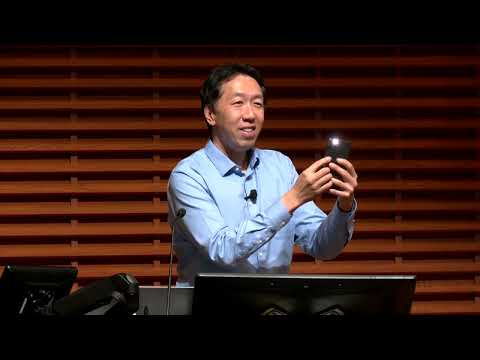

In [64]:
from IPython.display import YouTubeVideo

YouTubeVideo('5p248yoa3oE',start=37, width=800, height=300)

In [55]:
pip install markdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
a = "https://www.youtube.com/watch?v=5p248yoa3oE&t=37.34"
a

'https://www.youtube.com/watch?v=5p248yoa3oE&t=37.34'